In [45]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
def rho_free(x,xp,beta):
    return (np.exp((-(x-xp)**2)/(2.0*beta)))/np.sqrt(2.0*np.pi*beta)
def rho_harmonic_trotter(grid,beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2+xp**2)) for x in grid] for xp in grid])

x_max=5.0
nx=100
dx=2.0*x_max/(nx-1)
x= [i*dx for i in range(-(nx-1)/2,nx/2+1)]
beta_tmp=2.0**(-5)
beta=2.0**2
rho=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho = np.dot(rho,rho)
    rho *=dx
    beta_tmp *=2.0
    print "beta: %s -> %s" % (beta_tmp/2.0,beta_tmp)

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


In [61]:
z=np.sum(rho[i,i] for i in range(0,nx+1))*dx
pi_of_x=[rho[j,j]/z for j in range(0,nx+1)]
f=open("data_harm_matrixsquaring_beta"+str(beta)+".dat","w")
for j in range(nx+1):
    f.write(str(x[j])+" "+str(rho[j,j]/z)+"\n")
f.close()

def piquan(beta):
    x=np.linspace(-6,6,500)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes

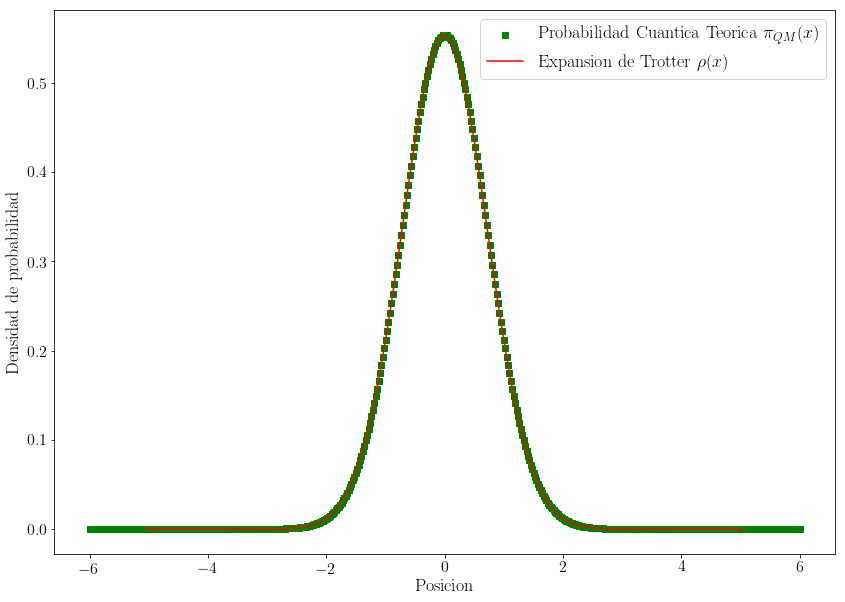

In [74]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.plot(piquan(4)[0],piquan(4)[1],"gs",label=r"Probabilidad Cuantica Teorica $\pi_{QM}(x)$")
plt.plot(x,pi_of_x,"r",label=r"Expansion de Trotter $\rho(x)$")
plt.legend(fontsize=18)

## Limite de alta temperatura para $\pi_{QM}(x)$

Podemos ver el límite de alta temperatura de la densidad de probabilidad cuántica dada por la expresión:
<n>
$\pi_{QM}(x)=\sqrt{\frac{\tanh\left(\frac{\beta}{2}\right)}{\pi}}e^{-x^2\tanh\left(\frac{\beta}{2}\right)}$.
<n>
En el caso de alta temperatura $T\to\infty$ por tanto $\beta=\frac{1}{T}\to0$, veamos entonces que forma toma la expresión $\tanh\left(\frac{\beta}{2}\right)$ <b>a primer orden</b> en $\beta$:
<n>
$\tanh\left(\frac{\beta}{2}\right)=\frac{\sinh\left(\frac{\beta}{2}\right)}{\cosh\left(\frac{\beta}{2}\right)}=\frac{e^{\beta/2}-e^{-\beta/2}}{e^{\beta/2}+e^{-\beta/2}}\approx \frac{(1+\beta/2)-(1-\beta/2)}{(1+\beta/2)+(1-\beta/2)}=\frac{\beta}{2}$.
<n>
Así $$\lim_{\beta \to 0}\pi_{QM}(x)=\sqrt{\frac{\beta}{2\pi}}e^{-\frac{\beta}{2}x^2}=\pi_{class}(x)$$, y esta expresión es exactamente la expresión para la densidad de probabilidad clásica.

In [64]:
piquan(4)

[array([-6.        , -5.9759519 , -5.95190381, -5.92785571, -5.90380762,
        -5.87975952, -5.85571142, -5.83166333, -5.80761523, -5.78356713,
        -5.75951904, -5.73547094, -5.71142285, -5.68737475, -5.66332665,
        -5.63927856, -5.61523046, -5.59118236, -5.56713427, -5.54308617,
        -5.51903808, -5.49498998, -5.47094188, -5.44689379, -5.42284569,
        -5.3987976 , -5.3747495 , -5.3507014 , -5.32665331, -5.30260521,
        -5.27855711, -5.25450902, -5.23046092, -5.20641283, -5.18236473,
        -5.15831663, -5.13426854, -5.11022044, -5.08617234, -5.06212425,
        -5.03807615, -5.01402806, -4.98997996, -4.96593186, -4.94188377,
        -4.91783567, -4.89378758, -4.86973948, -4.84569138, -4.82164329,
        -4.79759519, -4.77354709, -4.749499  , -4.7254509 , -4.70140281,
        -4.67735471, -4.65330661, -4.62925852, -4.60521042, -4.58116232,
        -4.55711423, -4.53306613, -4.50901804, -4.48496994, -4.46092184,
        -4.43687375, -4.41282565, -4.38877756, -4.3

In [65]:
piquan(16)

[array([-6.        , -5.9759519 , -5.95190381, -5.92785571, -5.90380762,
        -5.87975952, -5.85571142, -5.83166333, -5.80761523, -5.78356713,
        -5.75951904, -5.73547094, -5.71142285, -5.68737475, -5.66332665,
        -5.63927856, -5.61523046, -5.59118236, -5.56713427, -5.54308617,
        -5.51903808, -5.49498998, -5.47094188, -5.44689379, -5.42284569,
        -5.3987976 , -5.3747495 , -5.3507014 , -5.32665331, -5.30260521,
        -5.27855711, -5.25450902, -5.23046092, -5.20641283, -5.18236473,
        -5.15831663, -5.13426854, -5.11022044, -5.08617234, -5.06212425,
        -5.03807615, -5.01402806, -4.98997996, -4.96593186, -4.94188377,
        -4.91783567, -4.89378758, -4.86973948, -4.84569138, -4.82164329,
        -4.79759519, -4.77354709, -4.749499  , -4.7254509 , -4.70140281,
        -4.67735471, -4.65330661, -4.62925852, -4.60521042, -4.58116232,
        -4.55711423, -4.53306613, -4.50901804, -4.48496994, -4.46092184,
        -4.43687375, -4.41282565, -4.38877756, -4.3

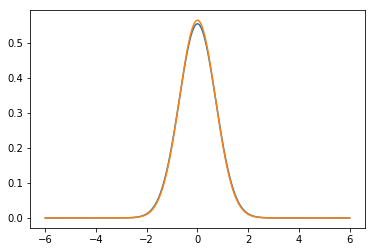

In [68]:
plt.plot(piquan(4)[0],piquan(4)[1],label="Probabilidad Cuantica")
plt.plot(piquan(16)[0],piquan(16)[1],label="Probabilidad Cuantica")